In [10]:
# IMPORT GEODATA

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc

shapefile = 'ne_110m_admin_0_countries.shp'

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()


,country,country_code,geometry
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...
2,Western Sahara,SAH,POLYGON ((-8.665589565454809 27.65642588959236...
3,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  (POLYGON ((-48.66061601418252 -78.047018731598...  


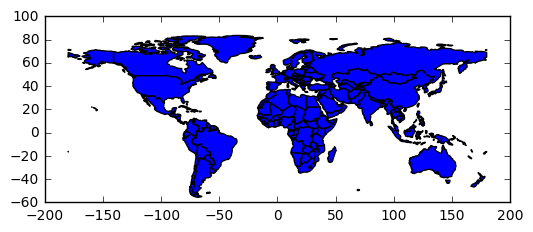

In [12]:
# drop antartica, uneccessary

print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf2 = gdf.drop(gdf.index[159])

gdf2.plot()


In [7]:
#IMPORT DATA 

import pandas as pd

datafile = 'raw_data_updated.csv'
df = pd.read_csv(datafile)  
df.head()

,COUNTRY,VALUE,MG,CODE
0,Afghanistan,115.2,7.0,AFG
1,Albania,178.3,40.0,ALB
2,Algeria,123.5,15.0,DZA
3,Angola,100.8,6.0,AGO
4,Argentina,216.7,17.0,ARG


In [13]:
# join the geodataframe with the cleaned up csv dataframe
merged = gdf2.set_index('country_code').join(df.set_index('CODE'))
merged.head()

,country,geometry,COUNTRY,VALUE,MG
country_code,,,,,
FJI,Fiji,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",Fiji,139.1,9.0
TZA,United Republic of Tanzania,POLYGON ((33.90371119710453 -0.950000000000000...,Tanzania (United Republic of),123.7,6.0
SAH,Western Sahara,POLYGON ((-8.665589565454809 27.65642588959236...,NaN,NaN,NaN
CAN,Canada,"(POLYGON ((-122.84 49.00000000000011, -122.974...",Canada,295.7,27.0
USA,United States of America,"(POLYGON ((-122.84 49.00000000000011, -120 49....",United States of America,318.0,38.0


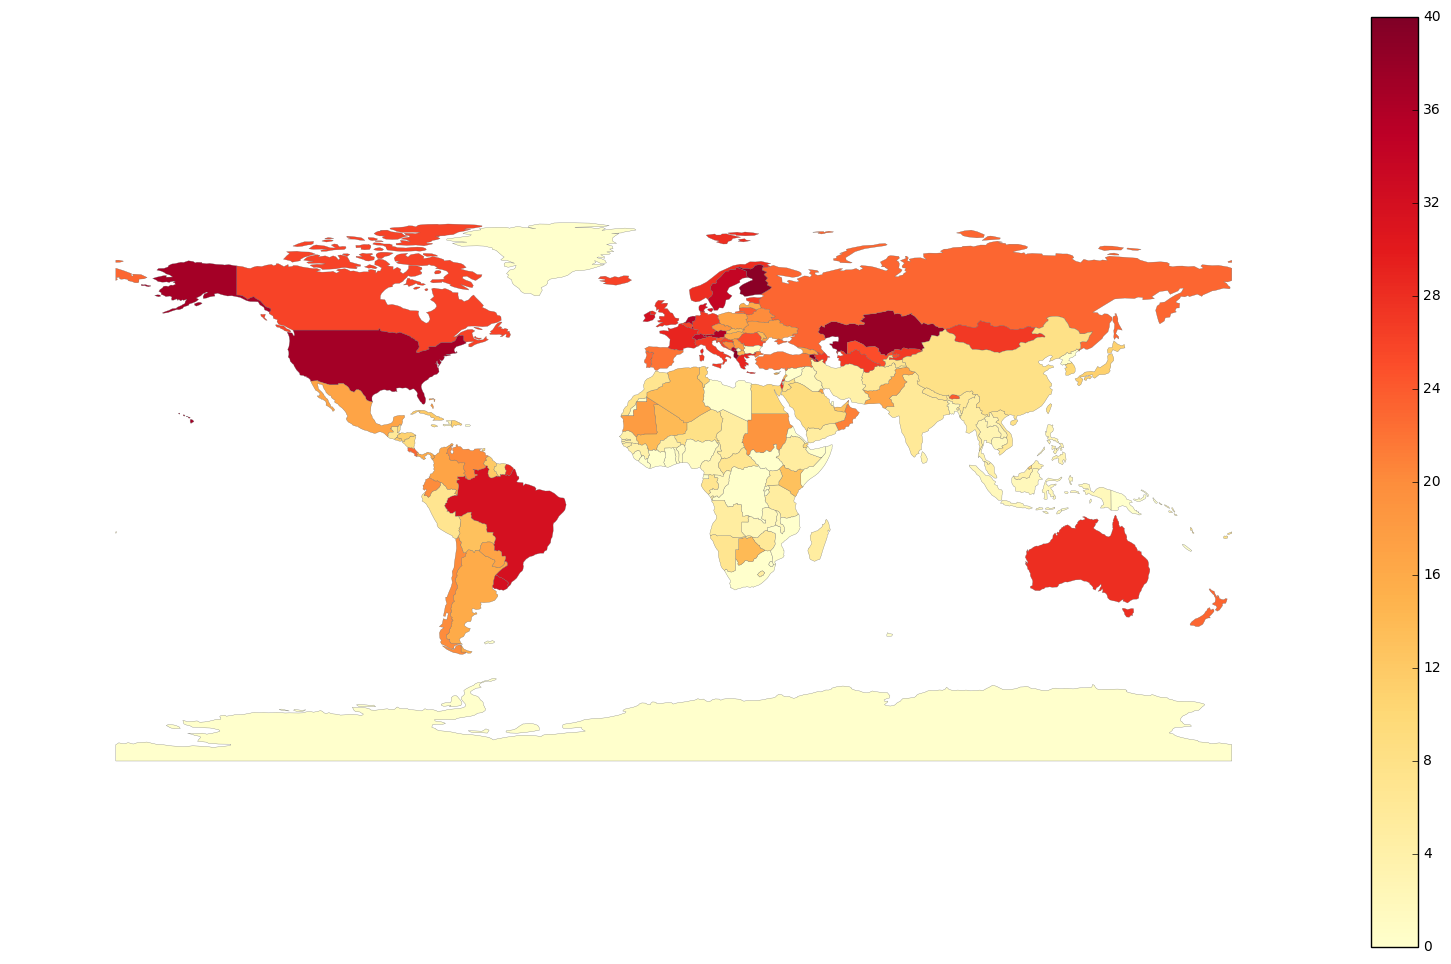

In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd


merged = gdf.set_index('country_code').join(df.set_index('CODE'))
merged.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'MG'
# set the range for the choropleth
vmin, vmax = 0, 40 
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))

merged.plot (column=variable, cmap = 'YlOrRd', linewidth=0.2, ax=ax, edgecolor='0.4')

# remove the axis
ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

fig.savefig('map_simple.eps')


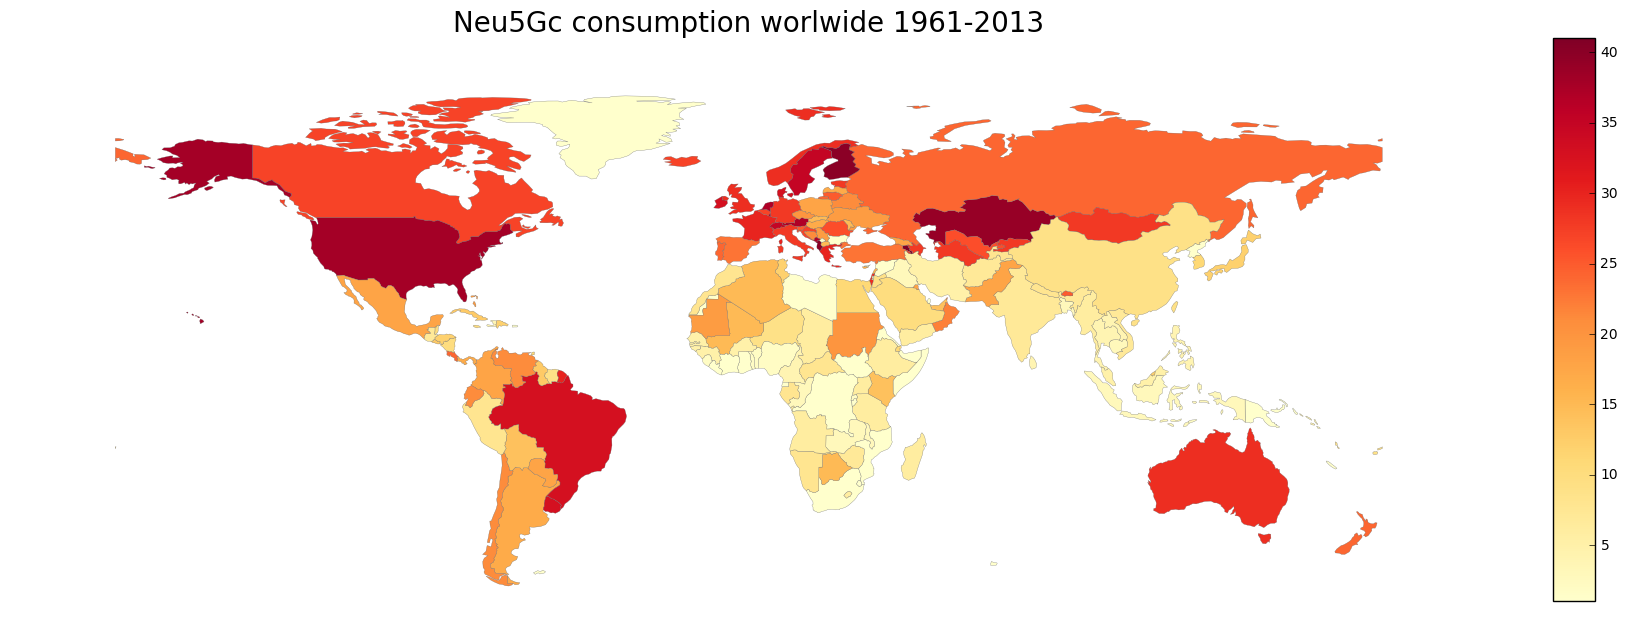

In [14]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'MG'


# set the range for the choropleth ---- vmax/vmin = Minimum value to be shown on the map. 
# If vmin is larger than the actual minimum value in the data, some of the data values will be “clipped”. 
# This is useful if there are extreme values in the data and you do not want those values to complete skew 
# the color distribution.
# !!!! NB !!!!!! questo passaggio non e necessatio per questa versione di jupyter, perche e gia integrato,
# per versione nuova vedi documentazione >>> https://github.com/ResidentMario/geoplot/issues/163
 
#vmin, vmax = 0, 500000


# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))

# add a title
title='Neu5Gc consumption worlwide 1961-2013'
ax.set_title(title, fontdict= 
            {'fontsize':20, 'fontweight':'3'})

# remove the axis
ax.axis('off')

# Create colorbar as a legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=1) #size=larghezza legend; pad= anchor 

merged.plot (column=variable, 
             #scheme='equal_interval', k=20, ----- NB if scheme >>> #create color bar legend non deve essere presente
             cmap = 'YlOrRd', linewidth=0.2, ax=ax, edgecolor='0.4', 
             legend=True, cax=cax)


fig.savefig('map_world.eps') 

In [19]:
#missing values

#Perform left merge to preserve every row in gdf.
merged = gdf.merge (df, left_on = 'country_code', right_on = 'CODE', how = 'left')

#Replace NaN values to string 'No data'.
merged.fillna ('No data', inplace = True)

merged.head()

#Instantiate LinearColorMapper that maps numbers in a range linearly into a sequence of colors. Input nan_color.
color_mapper = LinearColormap(palette=palette, low = 0, high = 40, nan_color = '#d9d9d9')


NameError: name 'LinearColormap' is not defined